# Proyecto empresa de viajes compartidos

### Descripción del proyecto

Durante este proyecto analizaré datos para una nueva empresa de viajes compartidos que se esta lanzando en Chicago. El objetivo será encontrar patrones en los datos y entender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

#### Descripción de los datos

 Tabla 1: contiene datos sobre la cantidad de viajes que realizó cada compañía.
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

Tabla 2: contiene datos sobre la finalización de los viajes 
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Tabla 3:
Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 
- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

### Análisis exploratorio de datos

In [ ]:
# Importación de librerías a utilizar

import pandas as pd
from scipy import stats as st
from scipy.stats import levene
import matplotlib.pyplot as  plt
from seaborn import boxplot

In [ ]:
# Importación de archivo 1: número de viajes por compañia

companies_trips= pd.read_csv('/datasets/project_sql_result_01.csv')
companies_trips.info()
companies_trips.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
# Chequeo de valores ausentes

companies_trips.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [ ]:
# Chequeo de valores duplicados

companies_trips.duplicated().sum()

0

In [ ]:
# Importación de archivo 2: promedio de viajes por barrio 

dropoff_location= pd.read_csv('/datasets/project_sql_result_04.csv')
dropoff_location.info()
dropoff_location.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
# Chequeo de valores ausentes 

dropoff_location.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [ ]:
# Chequeo de valores duplicados

dropoff_location.duplicated().sum()

0

In [ ]:
# Identificar los 10 principales barrios en términos de finalización del recorrido

dropoff_location.sort_values(by= 'average_trips',ascending= False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:title={'center':'Viajes por empresa de taxi'}, xlabel='company_name', ylabel='trips_amount'>

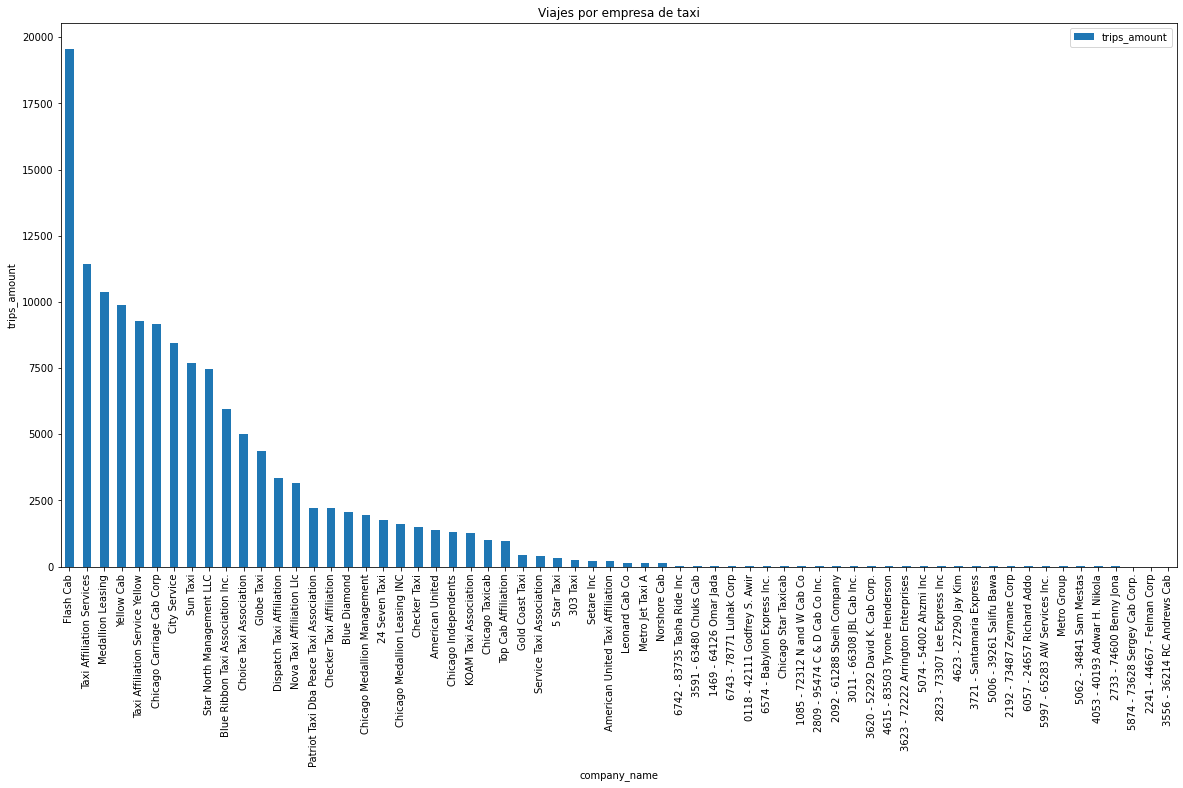

In [ ]:
#Gráfico: empresas de taxis y número de viajes

companies_trips.plot(kind='bar',x='company_name', y='trips_amount', ylabel='trips_amount', figsize=(20,10), title='Viajes por empresa de taxi')

Como podemos observar en el gráfico de arriba, la empresa de taxis más usada los días 15 y 16 de noviembre fue Flash Cab. Ésta realizó casi el doble de viajes que la empresa que le sigue: Taxi Affiliation Services. 

A su vez, dejando de lado Flash Cab que fue sin dudas la más poplar, podemos observar que hay pequeños grupos de compañías en los cuales no difiere tanto la cantidad de viajes realizados. Por ejemplo, las otras 5 copañías principales de taxis realizaron entre 9180 a 11400 viajes.

Por otro lado, podemos observar que la mitad de las compañías de taxis tuvieron muy pocos viajes esos días. 

<AxesSubplot:title={'center':'Principales barrios'}, xlabel='dropoff_location_name', ylabel='Trips amount'>

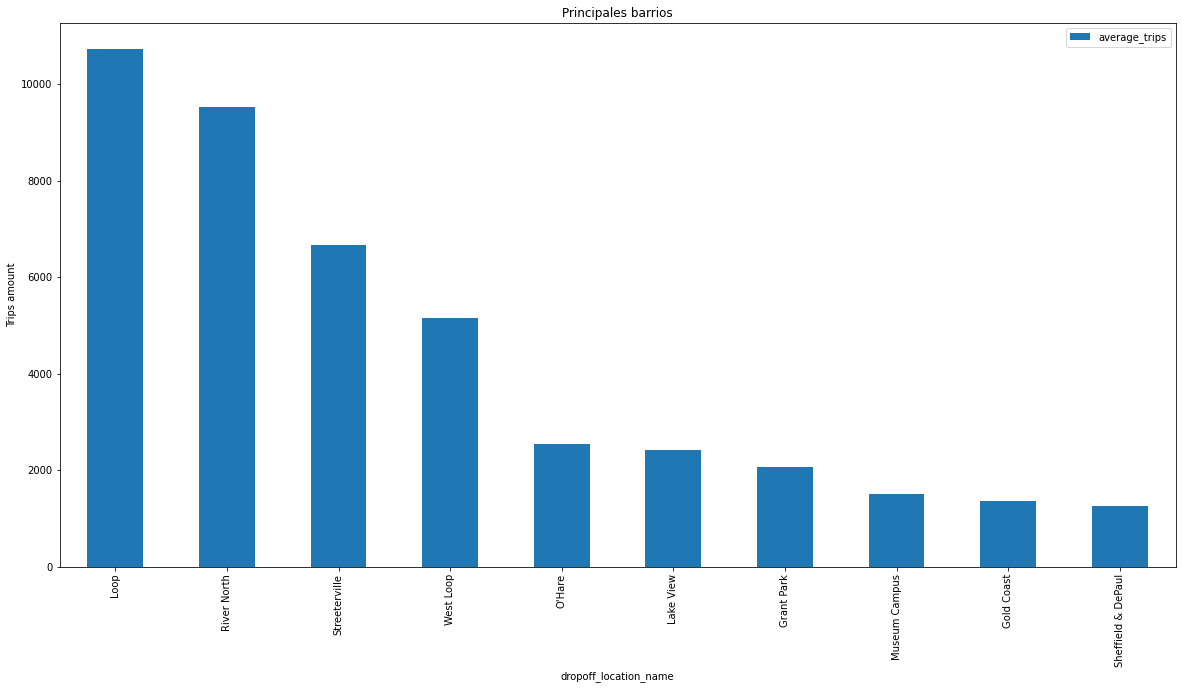

In [ ]:
# Gráfico 10 barrios principales por número de finalizaciones

dropoff_location.sort_values(by= 'average_trips',ascending= False).head(10).plot(kind='bar',x='dropoff_location_name', y='average_trips', ylabel='Trips amount', figsize=(20,10), title='Principales barrios')

Como podemos observar en el gráfico de arriba, se muestran los 10 barrios principales hacia los cuales se dirigieron los taxis  (destino final). El barrio con más viajes fue Loop con un promedio de 10727 viajes en el mes de noviembre seguido por River North con un promedio de 9523 viajes.

Después se encuentran Streeterville	y West Loop con un promedio de viajes de 6664 y 5163 respectivamente y por último un tercer grupo en la tabla con barrios con un promedio de viajes entre 1260 a 2420 en el mes de noviembre. 

### Prueba de hipótesis

A continuación voy a importar el archivo con los datos que usare para hacer la prueba de hipótesis.

In [ ]:
# Importación de archivo para trabajar sobre la hipótesis

archivo_hipotesis = pd.read_csv('/datasets/project_sql_result_07.csv')
archivo_hipotesis.info()
archivo_hipotesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
# Chequeo de valores ausentes

archivo_hipotesis.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [ ]:
# Chequeo de valores duplicados

archivo_hipotesis.duplicated().sum()

197

In [ ]:
archivo_hipotesis.value_counts()

start_ts             weather_conditions  duration_seconds
2017-11-11 08:00:00  Good                1380.0              8
2017-11-11 06:00:00  Good                1260.0              8
                                         1380.0              7
2017-11-11 16:00:00  Good                2400.0              6
2017-11-11 08:00:00  Good                1200.0              6
                                                            ..
2017-11-11 04:00:00  Good                1380.0              1
                                         1477.0              1
                                         1491.0              1
                                         1620.0              1
2017-11-25 23:00:00  Good                1500.0              1
Length: 871, dtype: int64

Como podemos observar, en el archivo que nos dieron para hacer la prueba de hipótesis tenemos valores duplicados. Estos pueden deberse a que el archivo contiene los datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Puede que haya determinadas paradas en Loop con destino hacia el aeropuerto. Al ser un punto fijo es posible que en condiciones normales, el recorrido dure siempre lo mismo; todos los los viajes que salgan de ahi a una determnada hora van a tardar lo mismo generando que haya varios datos con os mismos tiempos.

<AxesSubplot:xlabel='duration_seconds', ylabel='weather_conditions'>

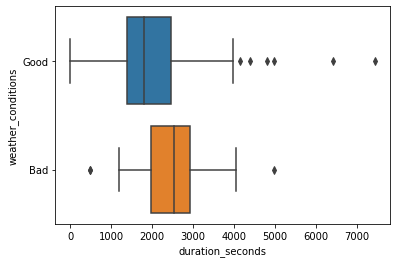

In [ ]:
boxplot(data= archivo_hipotesis, x="duration_seconds", y="weather_conditions")

Voy a probar la hipótesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Hipótesis nula: la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional de O'Hare no difiere los sábados lluviosos. 

Hipótesis alternativa: la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare difiere los sábados lluviosos.

Previo a la prueba de hipótesis voy a realizar la prueba de levene para ver si las varianzas son iguales. Usaré como hipótesis nula: las varianzas son iguales y como hipótesis alternativa las varianzas no son iguales.

In [ ]:
# Prueba de hipotesis nula levene: varianzas son iguales 

datos_lluvia= archivo_hipotesis.query('weather_conditions == "Bad" and duration_seconds >0')
datos_good= archivo_hipotesis.query('weather_conditions =="Good"and duration_seconds >0')

lluvia= datos_lluvia['duration_seconds']
good= datos_good['duration_seconds']

alpha= 0.05

stat,results= levene(lluvia, good)
print('P_value:', results)

if results < alpha:
    print('Rechazo la hipótesis nula')
else:
    print('No rechazo la hipótesis nula')

P_value: 0.6687312920630069
No rechazo la hipótesis nula


Como podemos observar de la prueba de Levene realizada arriba, no rechazamos la hipótesis nula que indica que las varianzas son iguales. 

A continuación realizare la prueba de hipótesis.

In [ ]:
# Ho: la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional de O'Hare no difiere los sábados lluviosos.

alpha= 0.05
results= st.ttest_ind(lluvia,good, equal_var= True)
print('P_value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazo la hipótesis nula')
else: 
    print('No rechazo hipótesis nula')

P_value: 1.3318772977743245e-11
Rechazo la hipótesis nula


De acuerdo con los datos con los que contamos, rechazo la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el aeropuerto de O'Hare cambia los sábados lluviosos.

## Conclusión 

Para concluir, podemos decir que la empresa de taxis más utilizada es Flash Cab seguida por Taxi Affiliation Services, teniendo la primera casi el doble de viajes que la segunda. Esta diferencia puede deberse a que Flash Cab sea una empresa mucho más grande que las otras; al tener una flota de autos más grande en la calle le permite tener el doble de viajes que su competidor más cercano. 

Con respecto a los detinos finales de los viajes, Loop resulto el más concurrido seguido de cerca por River North.

Por último la duración promedio de los viajes difiere un día lluvioso en comparación a un día de buen tiempo. Esta diferencia puede deberse principalmente al factor climático. Los días de mal tiempo puede que haya más tránsito porque la gente decide salir con sus autos y se genera más congestión. También la gente anda un poco más despacio impactando en la duración pormedio de los viajes.  